<a href="https://colab.research.google.com/github/firstnattaporn/6410210097/blob/main/DataSci_miniProject_6410210097.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

/kaggle/input


Importing the required libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

Importing data into tensorflow dataset object

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Data Set for Data Sci/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.3251087  0.3802396  0.42330053]
  [0.3239159  0.37976244 0.42258486]
  [0.3227231  0.3792853  0.42186916]
  ...
  [0.3388898  0.29684246 0.4136721 ]
  [0.4011581  0.4049961  0.4886025 ]
  [0.09831417 0.09823787 0.23903285]]

 [[0.21802606 0.27292803 0.30838928]
  [0.22470583 0.2796078  0.31554618]
  [0.2313856  0.28628758 0.32270306]
  ...
  [0.34318393 0.30399933 0.41868192]
  [0.38207304 0.38567248 0.4728573 ]
  [0.11143515 0.11112029 0.25072244]]

 [[0.4148849  0.46595612 0.4974195 ]
  [0.40247962 0.45378938 0.4854913 ]
  [0.3900743  0.44162264 0.47356316]
  ...
  [0.34747806 0.31115624 0.42369175]
  [0.36298797 0.36634883 0.45711216]
  [0.12455613 0.12400271 0.26241204]]

 ...

 [[0.3109108  0.3109108  0.3109108 ]
  [0.2694734  0.2694734  0.2694734 ]
  [0.22920896 0.22920896 0.22920896]
  ...
  [0.07848548 0.07905343 0.08018934]
  [0.07681554 0.07714493 0.0778037 ]
  [0.07514559 0.07523642 0.07541807]]

 [[0.3104337  0.3104337  0.3104337 ]
  [0.26661065 0.26661065 0.26661065]


In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Data Set for Data Sci/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.8199154  0.8559782  0.9220299 ]
  [0.8269763  0.882353   0.93321466]
  [0.8117648  0.88201845 0.92899364]
  ...
  [0.88770866 0.88770866 0.9190812 ]
  [0.8845696  0.8845696  0.91594213]
  [0.881738   0.881738   0.9131106 ]]

 [[0.82367164 0.85822695 0.925263  ]
  [0.8266421  0.87952155 0.9321199 ]
  [0.81352293 0.882353   0.9298514 ]
  ...
  [0.87037736 0.87037736 0.9017499 ]
  [0.8682847  0.8682847  0.89965725]
  [0.8664293  0.8664293  0.8978019 ]]

 [[0.8294266  0.8629355  0.9304948 ]
  [0.8255957  0.8758593  0.93055034]
  [0.81561565 0.882353   0.93037456]
  ...
  [0.860749   0.860749   0.89212155]
  [0.85970265 0.85970265 0.8910752 ]
  [0.85865635 0.8589072  0.8900289 ]]

 ...

 [[0.47977886 0.47594088 0.4604219 ]
  [0.47934482 0.47542325 0.45973697]
  [0.4850998  0.48117822 0.46549195]
  ...
  [0.65882355 0.654902   0.64705884]
  [0.65047455 0.646553   0.63870984]
  [0.6449521  0.64103055 0.6331874 ]]

 [[0.51634145 0.5124199  0.49673367]
  [0.5305907  0.52666914 0.5109829 ]


Creating the CNN model

In [ ]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_7 (Dense)             (None, 96)               

Compiling the model

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=25
)

Epoch 1/25
105/105 [==============================] - 96s 877ms/step - loss: 1.9077 - accuracy: 0.2416 - val_loss: 1.8199 - val_accuracy: 0.3026
Epoch 2/25
105/105 [==============================] - 89s 846ms/step - loss: 1.7937 - accuracy: 0.3112 - val_loss: 1.7803 - val_accuracy: 0.3432
Epoch 3/25
105/105 [==============================] - 98s 932ms/step - loss: 1.7027 - accuracy: 0.3643 - val_loss: 1.6015 - val_accuracy: 0.4194
Epoch 4/25
105/105 [==============================] - 91s 860ms/step - loss: 1.5735 - accuracy: 0.4209 - val_loss: 1.4611 - val_accuracy: 0.4908
Epoch 5/25
105/105 [==============================] - 88s 840ms/step - loss: 1.4400 - accuracy: 0.4761 - val_loss: 1.4023 - val_accuracy: 0.4982
Epoch 6/25
105/105 [==============================] - 88s 838ms/step - loss: 1.3422 - accuracy: 0.5134 - val_loss: 1.3409 - val_accuracy: 0.5203
Epoch 7/25
105/105 [==============================] - 89s 841ms/step - loss: 1.2439 - accuracy: 0.5483 - val_loss: 1.1832 - val_ac

In [ ]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 11s 424ms/step - loss: 1.0506 - accuracy: 0.6950


In [ ]:
scores

[1.0506054162979126, 0.6949569582939148]

In [ ]:
from tensorflow.keras.layers import Flatten, Dense

ทดสอบ MLP model เพื่อเปรียบเทียบกับ CNN

In [ ]:
# Initializing the MLP
mlp_model = Sequential()

# Adding the input layer and the first hidden layer
mlp_model.add(Flatten(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
mlp_model.add(Dense(128, activation='relu'))

# Adding more hidden layers
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(32, activation='relu'))

# Output layer
mlp_model.add(Dense(7, activation='softmax'))

mlp_model.summary()

# Compiling the MLP
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the MLP
mlp_history = mlp_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=25
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 49152)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               6291584   
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 7)                 231       
                                                                 
Total params: 6302151 (24.04 MB)
Trainable params: 6302151 (24.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
105

Plotting the accuracy and loss curves

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

25

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.9076794385910034,
 1.7936952114105225,
 1.702653169631958,
 1.5735158920288086,
 1.439950704574585]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

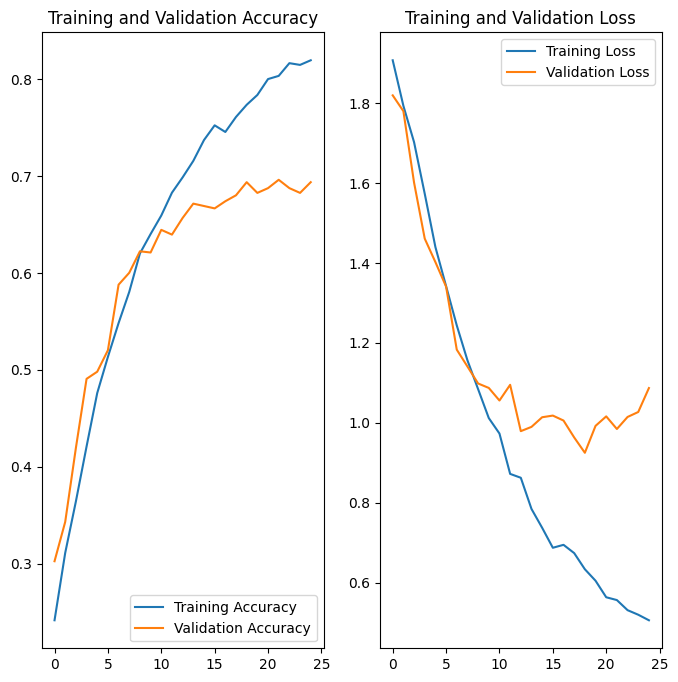

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 25

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Testing the prediction on sample of image from test dataset

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


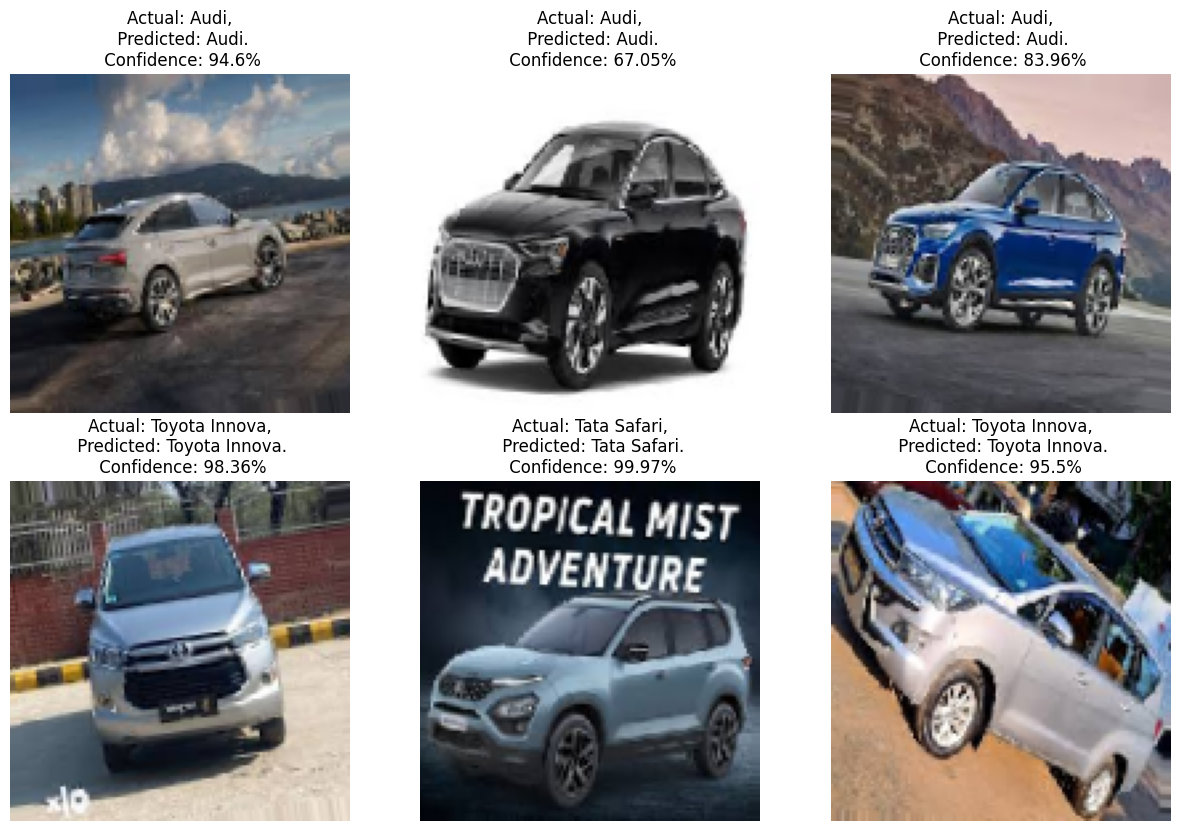

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break